In [422]:
# Import libraries, features and settings (not all of these are needed so pull what you need)

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import io

DATA_FILE_LOCATION = './data/data.csv'
FEATURES = ['Island', 'Culmen Length (mm)', 'Sample Number']
LABEL = 'Species'


%matplotlib inline
sns.set()
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [423]:
# Built in colab with local data upload

# uploaded = pd.read_csv('data/train.csv')

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))


In [424]:
# Explore data

df = pd.read_csv('./data/data.csv')
# FEATURES = ['Island', 'Culmen Length (mm)']
# LABEL = 'Species'
b = []
for i in range(len(FEATURES)):
    b.append(FEATURES[i])
b.append(LABEL)
df = df[b]

# df.head()


In [425]:
df

,Island,Culmen Length (mm),Sample Number,Species
0,Torgersen,39.1,1,Adelie Penguin (Pygoscelis adeliae)
1,Torgersen,39.5,2,Adelie Penguin (Pygoscelis adeliae)
2,Torgersen,40.3,3,Adelie Penguin (Pygoscelis adeliae)
3,Torgersen,NaN,4,Adelie Penguin (Pygoscelis adeliae)
4,Torgersen,36.7,5,Adelie Penguin (Pygoscelis adeliae)
...,...,...,...,...
339,Biscoe,NaN,120,Gentoo penguin (Pygoscelis papua)
340,Biscoe,46.8,121,Gentoo penguin (Pygoscelis papua)
341,Biscoe,50.4,122,Gentoo penguin (Pygoscelis papua)
342,Biscoe,45.2,123,Gentoo penguin (Pygoscelis papua)


In [426]:
# Non Continous Data To Continous


df['Species'] = pd.Categorical(df['Species']).codes
df['Island'] = pd.Categorical(df['Island']).codes

# for i in range(len(df.Island)):
#     if df['Culmen Length (mm)'][i] == 0:
#         df['Culmen Length (mm)'][i] == df['Culmen Length (mm)'].mean()
df = df.dropna()
# s_df

In [427]:
# for i in range(len(df.Island)):
#     df.Island[i] = (IslandDict(df.Island[i]))
# df

In [428]:
# Split data into train test sets

from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.2)


In [429]:
# Creating the dataframes for training and test datasets
train_df = trainingSet
test_df = testSet

# Clean the missing values if needed
#train_df = train_df.dropna()
#test_df = test_df.dropna()


In [430]:
# Since the data is already split into Train and Test datasets, load the values into X_train, X_test, y_train, y_test
#X_train = train_df.iloc[:,:-1].values
#y_train = train_df.iloc[:,1].values
#X_test = test_df.iloc[:,:-1].values
#y_test = test_df.iloc[:,1].values

X_train = train_df[FEATURES]

y_train = train_df[[LABEL]]

X_test = test_df[FEATURES]

y_test = test_df[[LABEL]]


In [431]:
train_df

,Island,Culmen Length (mm),Sample Number,Species
317,0,46.9,98,2
250,0,47.3,31,2
174,1,43.2,23,1
288,0,43.5,69,2
122,2,40.2,123,0
...,...,...,...,...
232,0,45.5,13,2
44,1,37.0,45,0
212,1,51.9,61,1
60,0,35.7,61,0


<AxesSubplot: xlabel='Culmen Length (mm)', ylabel='Species'>

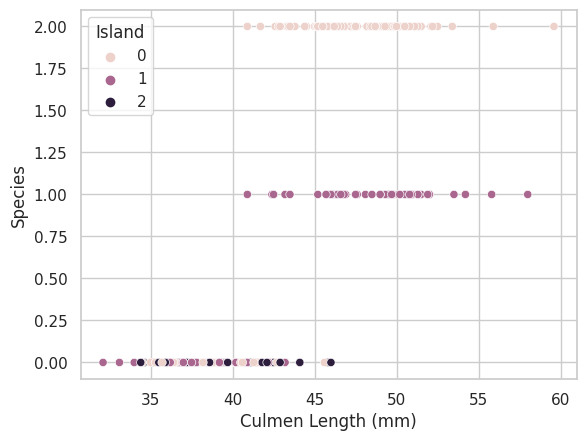

In [432]:
# sns.countplot(LABEL, data=train_df, palette='Blues_d')
sns.scatterplot(data=train_df, y='Species', x='Culmen Length (mm)', hue='Island')
# plt.show()
# plt.savefig('count_plot')

In [433]:
# SIMPLE OBSERVATIONS FROM GRAPH



# count_no_choc = len(train_df[train_df['chocolate'] == 0])
# count_choc = len(train_df[train_df['chocolate'] == 1])
# pct_of_no_choc = count_no_choc/(count_no_choc+count_choc)
# print("percentage of no chocolate is", pct_of_no_choc*100)
# pct_of_choc = count_choc/(count_no_choc+count_choc)
# print("percentage of chocolate", pct_of_choc*100)


In [434]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


/home/riley/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/riley/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [435]:
print(y_pred)

[2 1 2 2 2 0 1 2 2 2 1 2 1 1 0 0 2 0 0 0 1 0 0 0 2 2 0 0 1 2 0 2 0 1 2 0 2
 0 0 2 2 1 1 2 0 2 0 1 2 0 0 2 1 0 2 0 1 2 0 0 0 0 0 0 1 2 2 0 1]


In [436]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [437]:
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:", metrics.precision_score(y_test, y_pred), average='weighted')
# print("Recall:",metrics.recall_score(y_test, y_pred), average='weighted')

Accuracy: 1.0


In [438]:
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


ValueError: multiclass format is not supported